In [ ]:
INSTALL DOCKER
=============================

[root@mysqlprod01 Downloads]# sudo dnf config-manager 
--add-repo=https://download.docker.com/linux/centos/docker-ce.repo


[root@mysqlprod01 Downloads]# sudo dnf install 
https://download.docker.com/linux/centos/7/x86_64/stable/Packages/containerd.io-1.2.10-3.2.el7.x86_64.rpm


[root@mysqlprod01 Downloads]# sudo dnf install docker-ce --nobest


[root@mysqlprod01 Downloads]# rpm -qa | grep docker

docker-compose-plugin-2.27.0-1.el8.x86_64
docker-ce-cli-26.1.3-1.el8.x86_64
docker-buildx-plugin-0.14.0-1.el8.x86_64
docker-ce-19.03.15-3.el8.x86_64

[root@mysqlprod01 Downloads]# 


ADD USERS TO DOCKER GROUP
==========================================

[root@mysqlprod01 Downloads]# usermod -a -G docker mysqluser 
[root@mysqlprod01 Downloads]# 

[root@mysqlprod01 Downloads]# id mysqluser
uid=1000(mysqluser) gid=1000(mysqluser) groups=1000(mysqluser),10(wheel),974(docker)
[root@mysqlprod01 Downloads]# 


ENABLE AND START DOCKER
=========================================

[root@mysqlprod01 Downloads]# systemctl enable docker.service

Created symlink /etc/systemd/system/multi-user.target.wants/docker.service → 
/usr/lib/systemd/system/docker.service.

[root@mysqlprod01 Downloads]# systemctl start docker.service
[root@mysqlprod01 Downloads]# 

[root@mysqlprod01 Downloads]# systemctl status docker.service

● docker.service - Docker Application Container Engine
   Loaded: loaded (/usr/lib/systemd/system/docker.service; enabled; vendor preset: disabled)
   Active: active (running) since Sat 2024-05-25 00:41:22 IST; 8s ago


LIST DOCKER IMAGES AND CONTAINERS
========================================

[root@mysqlprod01 Downloads]# docker images
REPOSITORY   TAG       IMAGE ID   CREATED   SIZE
[root@mysqlprod01 Downloads]# 

[root@mysqlprod01 Downloads]# docker ps
CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES
[root@mysqlprod01 Downloads]# 

[root@mysqlprod01 Downloads]# docker ps -a
CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES
[root@mysqlprod01 Downloads]# 


SEARCH AND PULL MySQL IMAGE
=========================================

[root@mysqlprod01 Downloads]# docker search mysql

NAME                            DESCRIPTION                                     STARS     OFFICIAL
mysql                           MySQL is a widely used, open-source relation…   15079     [OK]
mariadb                         MariaDB Server is a high performing open sou…   5754      [OK]
percona                         Percona Server is a fork of the MySQL relati…   628       [OK]
phpmyadmin                      phpMyAdmin - A web interface for MySQL and M…   980       [OK]
circleci/mysql                  MySQL is a widely used, open-source relation…   29        
bitnami/mysql                   Bitnami container image for MySQL               111       


[root@mysqlprod01 ~]# docker pull mysql/mysql-server:8.0.30

8.0.30: Pulling from mysql/mysql-server
cdd8b07c6082: Pull complete 
c2f1720beca1: Pull complete 
39f143a8d6de: Pull complete 
118a8285b641: Pull complete 
b45cbcaf75c7: Pull complete 
d4574372e600: Pull complete 
1f565a3cbc52: Pull complete 
Digest: sha256:e30a0320f2e3c7b7ee18ab903986ada6eb1ce8e5ef29941b36ec331fae5f10b2
Status: Downloaded newer image for mysql/mysql-server:8.0.30
docker.io/mysql/mysql-server:8.0.30

[root@mysqlprod01 ~]# 


[root@mysqlprod01 ~]# docker images

REPOSITORY           TAG       IMAGE ID       CREATED         SIZE
mysql/mysql-server   8.0.30    eb5713a2c247   22 months ago   428MB

[root@mysqlprod01 ~]# 



RUN MYSQL CONTAINER
===========================================


[root@mysqlprod01 ~]# docker run --name mysql_8030 -e MYSQL_ROOT_PASSWORD=Root@2024 -d mysql/mysql-server:8.0.30
05fea4793346b7a88b2d1ada82f34be38475b6cf45e8650f00c5c7e6ce19477a
[root@mysqlprod01 ~]# 


[root@mysqlprod01 ~]# docker ps
CONTAINER ID   IMAGE                       COMMAND                  CREATED          STATUS                             PORTS                       NAMES
05fea4793346   mysql/mysql-server:8.0.30   "/entrypoint.sh mysq…"   15 seconds ago   Up 13 seconds (health: starting)   3306/tcp, 33060-33061/tcp   mysql_8030
[root@mysqlprod01 ~]# 


[root@mysqlprod01 ~]# docker logs mysql_8030

[Entrypoint] MySQL Docker Image 8.0.30-1.2.9-server
[Entrypoint] Initializing database
2024-05-24T20:48:26.815138Z 0 [Warning] [MY-011068] [Server] The syntax '--skip-host-cache' is deprecated and 
will be removed in a future release. Please use SET GLOBAL host_cache_size=0 instead.

2024-05-24T20:48:31.597076Z 0 [System] [MY-010116] [Server] /usr/sbin/mysqld (mysqld 8.0.30) starting as process 63
2024-05-24T20:48:31.613668Z 1 [System] [MY-013576] [InnoDB] InnoDB initialization has started.
2024-05-24T20:48:31.814129Z 1 [System] [MY-013577] [InnoDB] InnoDB initialization has ended.
2024-05-24T20:48:32.211019Z 0 [Warning] [MY-010068] [Server] CA certificate ca.pem is self signed.
2024-05-24T20:48:32.211055Z 0 [System] [MY-013602] [Server] Channel mysql_main configured to support TLS.
 Encrypted connections are now supported for this channel.
2024-05-24T20:48:32.233613Z 0 [System] [MY-011323] [Server] X Plugin ready for connections. 
Socket: /var/run/mysqld/mysqlx.sock



VERIFY IF MYSQL IS RUNNING AS CONTAINER
================================================

[root@mysqlprod01 ~]# pidof mysqld
42647
[root@mysqlprod01 ~]# ps -ef | grep 42647 | grep -v grep
27         42647   42612  1 02:18 ?        00:00:03 mysqld --user=mysql
[root@mysqlprod01 ~]# 
[root@mysqlprod01 ~]# netstat -ntlp | grep 3306
[root@mysqlprod01 ~]# 


MYSQL CONTAINER HOST
===========================================

[root@mysqlprod01 ~]# docker exec -it mysql_8030 bash

bash-4.4# 
bash-4.4# mysql -u root -p
Enter password: 

mysql> select @@hostname , @@version;
+--------------+-----------+
| @@hostname   | @@version |
+--------------+-----------+
| 05fea4793346 | 8.0.30    |
+--------------+-----------+
1 row in set (0.00 sec)

mysql> create user peter identified by 'P$ter2024';
Query OK, 0 rows affected (0.01 sec)

mysql> grant all on *.* to peter;
Query OK, 0 rows affected (0.00 sec)

mysql> flush privileges;
Query OK, 0 rows affected (0.01 sec)



TRY CONNECTION FROM OUTSIDE 
=================================================


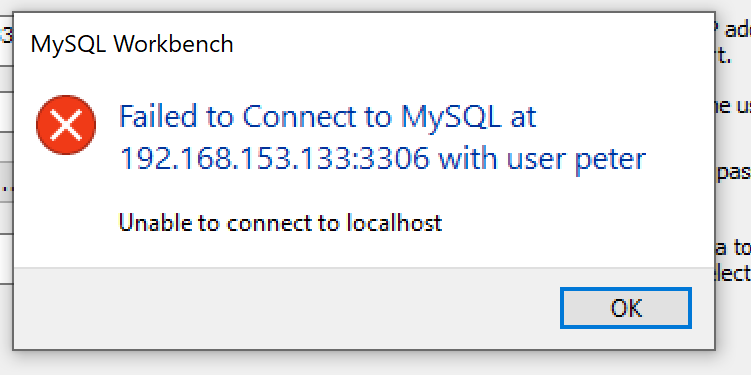

In [ ]:
REMOVE MYSQL CONTAINER
===========================================

[root@mysqlprod01 ~]# docker stop mysql_8030
mysql_8030

[root@mysqlprod01 ~]# docker ps
CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES
[root@mysqlprod01 ~]# 

[root@mysqlprod01 ~]# docker rm mysql_8030
mysql_8030

[root@mysqlprod01 ~]# docker ps -a
CONTAINER ID   IMAGE     COMMAND   CREATED   STATUS    PORTS     NAMES
[root@mysqlprod01 ~]# 


In [ ]:
EXPOSE CONTAINER PORT TO HOST
==============================================


[root@mysqlprod01 ~]# docker run --name mysql8_0_30 -e MYSQL_ROOT_PASSWORD=Root@2024 -d -p 3306:3306 mysql/mysql-server:8.0.30
974ed463dc3fd95b259cebace90e071c96f814f5ae402ff54dc13d56f3b55cf3
[root@mysqlprod01 ~]# 

[root@mysqlprod01 ~]# docker ps
CONTAINER ID   IMAGE                       COMMAND                  CREATED          STATUS                             PORTS                                     NAMES
974ed463dc3f   mysql/mysql-server:8.0.30   "/entrypoint.sh mysq…"   12 seconds ago   Up 11 seconds (health: starting)   0.0.0.0:3306->3306/tcp, 33060-33061/tcp   mysql8_0_30
[root@mysqlprod01 ~]# 

[root@mysqlprod01 ~]# pidof mysqld
45486
[root@mysqlprod01 ~]# 

[root@mysqlprod01 ~]# netstat -ntlp | grep 3306
tcp6       0      0 :::3306                 :::*                    LISTEN      45465/docker-proxy  
[root@mysqlprod01 ~]# 


[root@mysqlprod01 ~]# docker exec -it mysql8_0_30 bash
bash-4.4# 

bash-4.4# mysql -u root -p
Enter password: 

mysql> select @@hostname , @@version;
+--------------+-----------+
| @@hostname   | @@version |
+--------------+-----------+
| 974ed463dc3f | 8.0.30    |
+--------------+-----------+
1 row in set (0.00 sec)

mysql> create user robert identified by 'R@bert2024';
Query OK, 0 rows affected (0.01 sec)

mysql> grant all on *.* to robert;
Query OK, 0 rows affected (0.01 sec)

mysql> flush privileges;
Query OK, 0 rows affected (0.01 sec)


TRY CONNECTION FROM OUTSIDE 
=================================================


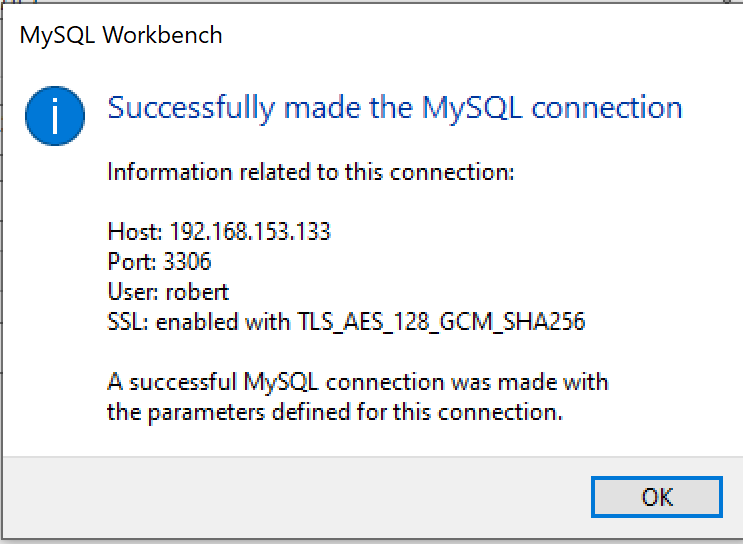

In [ ]:
BIND LOCAL VOLUME
=====================================

[root@mysqlprod01 ~]# ls -rtl /opt/mysql/data
total 0


[root@mysqlprod01 ~]# docker run --name mysql8030 -e MYSQL_ROOT_PASSWORD=Root@2024 -d -p 3307:3306 -v 
/opt/mysql/data:/var/lib/mysql mysql/mysql-server:8.0.30

e5d0f8cf9335c26e4066d3f627c3739fac090cee2c17f0b8e6444dada68b5ed1

[root@mysqlprod01 ~]# 

[root@mysqlprod01 ~]# docker ps

CONTAINER ID   IMAGE                       COMMAND                  CREATED          STATUS                            PORTS                                     NAMES
e5d0f8cf9335   mysql/mysql-server:8.0.30   "/entrypoint.sh mysq…"   7 seconds ago    Up 6 seconds (health: starting)   33060-33061/tcp, 0.0.0.0:3307->3306/tcp   mysql8030
974ed463dc3f   mysql/mysql-server:8.0.30   "/entrypoint.sh mysq…"   10 minutes ago   Up 10 minutes (healthy)           0.0.0.0:3306->3306/tcp, 33060-33061/tcp   mysql8_0_30

[root@mysqlprod01 ~]# 

[root@mysqlprod01 ~]# pidof mysqld
47610 45486
[root@mysqlprod01 ~]# netstat -ntlp | grep 3306
tcp6       0      0 :::3306                 :::*                    LISTEN      45465/docker-proxy  
[root@mysqlprod01 ~]# 
[root@mysqlprod01 ~]# netstat -ntlp | grep 3307
tcp6       0      0 :::3307                 :::*                    LISTEN      47580/docker-proxy  
[root@mysqlprod01 ~]# 


[root@mysqlprod01 ~]# ls -rtl /opt/mysql/data/
total 96716
-rw-r-----. 1 27 27       56 May 25 02:45  auto.cnf
-rw-r-----. 1 27 27  8585216 May 25 02:45 '#ib_16384_1.dblwr'
drwxr-x---. 2 27 27     8192 May 25 02:45  performance_schema
-rw-------. 1 27 27     1676 May 25 02:45  ca-key.pem
-rw-r--r--. 1 27 27     1112 May 25 02:45  ca.pem
-rw-------. 1 27 27     1676 May 25 02:45  server-key.pem
-rw-r--r--. 1 27 27     1112 May 25 02:45  server-cert.pem


[root@mysqlprod01 ~]# docker exec -it mysql8030 bash
bash-4.4# 
bash-4.4# mysql -u root -p
Enter password: 

mysql> select @@hostname , @@version;
+--------------+-----------+
| @@hostname   | @@version |
+--------------+-----------+
| e5d0f8cf9335 | 8.0.30    |
+--------------+-----------+
1 row in set (0.00 sec)

mysql> create user ranga identified by 'R@nga2024';
Query OK, 0 rows affected (0.01 sec)

mysql> grant all on *.* to ranga;
Query OK, 0 rows affected (0.00 sec)


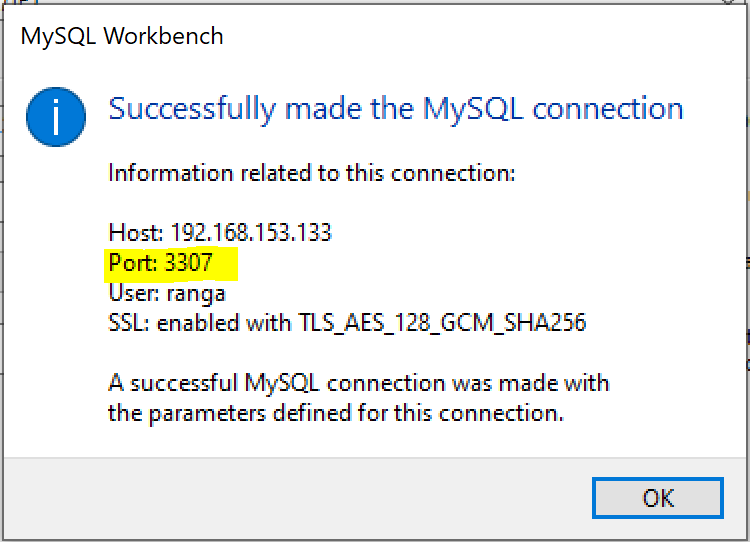

In [ ]:
CHECK DOCKER CPU AND MEMORY USAGE 
================================================

host cpu and memory usage 
--------------------------

Linux 4.18.0-348.7.1.el8_5.x86_64 (mysqlprod01) 	05/25/2024 	_x86_64_	(2 CPU)

04:10:55 PM  CPU    %usr   %nice    %sys %iowait    %irq   %soft  %steal  %guest  %gnice   %idle
04:10:55 PM  all    6.44    0.03    7.31    0.33    0.94    0.37    0.00    0.00    0.00   84.58

[mysqluser@mysqlprod01 ~]$ free -h
              total        used        free      shared  buff/cache   available
Mem:          3.6Gi       2.0Gi       250Mi        37Mi       1.4Gi       1.4Gi
Swap:         5.0Gi          0B       5.0Gi
[mysqluser@mysqlprod01 ~]$ 


docker containers cpu and memory usage 
--------------------------------------------

[mysqluser@mysqlprod01 ~]$ docker ps

CONTAINER ID   IMAGE                             STATUS                         NAMES  
e5d0f8cf9335   mysql/mysql-server:8.0.30        Up 8 minutes (healthy)          mysql8030
  
974ed463dc3f   mysql/mysql-server:8.0.30         Up 8 minutes (healthy)         mysql8_0_30


[mysqluser@mysqlprod01 ~]$ docker stats -a

CONTAINER ID   NAME          CPU %     MEM USAGE / LIMIT     MEM %     NET I/O       BLOCK I/O        PIDS
e5d0f8cf9335   mysql8030     0.74%     386.3MiB / 3.623GiB   10.41%    5.66kB / 0B   267MB / 31.6MB   39
974ed463dc3f   mysql8_0_30   0.77%     354.8MiB / 3.623GiB   9.56%     2.47kB / 0B   102MB / 31.6MB   39


increase memory in both mysql containers 
-----------------------------------------------------

[mysqluser@mysqlprod01 ~]$ docker cp mysql8030:/etc/my.cnf .
Successfully copied 3.07kB to /home/mysqluser/.
[mysqluser@mysqlprod01 ~]$ 
[mysqluser@mysqlprod01 ~]$ vi my.cnf 
[mysqluser@mysqlprod01 ~]$ 
[mysqluser@mysqlprod01 ~]$ cat my.cnf | grep innodb
innodb-buffer-pool-size = 1G
[mysqluser@mysqlprod01 ~]$ 
[mysqluser@mysqlprod01 ~]$ docker cp my.cnf mysql8030:/etc/my.cnf
Successfully copied 2.05kB to mysql8030:/etc/my.cnf
[mysqluser@mysqlprod01 ~]$ 

[mysqluser@mysqlprod01 ~]$ docker container stop mysql8030
mysql8030
[mysqluser@mysqlprod01 ~]$ docker container start mysql8030
mysql8030
[mysqluser@mysqlprod01 ~]$ docker ps


[mysqluser@mysqlprod01 ~]$ docker stop mysql8_0_30
mysql8_0_30
[mysqluser@mysqlprod01 ~]$ docker start mysql8_0_30
mysql8_0_30
[mysqluser@mysqlprod01 ~]$ 


Now check again docker containers cpu and memory usage
================================================================

CONTAINER ID   NAME          CPU %     MEM USAGE / LIMIT     MEM %     NET I/O       BLOCK I/O         PIDS
e5d0f8cf9335   mysql8030     0.98%     440.8MiB / 3.623GiB   11.88%    2.4kB / 0B    7.51MB / 31MB     43
974ed463dc3f   mysql8_0_30   1.03%     441MiB / 3.623GiB     11.89%    2.26kB / 0B   14.4MB / 29.4MB   42


Run some inserts into both the databases running in containers and check 
======================================================================================

create database ordersdb ;

use ordersdb;

create table orders (
order_id int primary key,
order_details varchar(100),
order_date datetime
);

delimiter //
create procedure sp_insertorders_data ( p_order_id int )
begin
        declare v_order_count int default 100000;
        declare v_order_max int;
        set v_order_max = p_order_id + v_order_count;
        
        while ( p_order_id < v_order_max ) do
            insert into orders values ( p_order_id , concat (' order details ',p_order_id) , now() );
            set p_order_id = p_order_id + 1;
		end while;
        
        select max( order_id ) from orders;
end//
delimiter ;


call sp_insertorders_data(1);


CONTAINER ID   NAME          CPU %     MEM USAGE / LIMIT     MEM %     NET I/O           BLOCK I/O        PIDS
e5d0f8cf9335   mysql8030     37.69%    472.7MiB / 3.623GiB   12.74%    15.5kB / 64.1kB   13MB / 2GB       46
974ed463dc3f   mysql8_0_30   41.33%    471.4MiB / 3.623GiB   12.71%    21.6kB / 83kB     18.3MB / 400MB   47

mysql> call sp_insertorders_data(1);
+-----------------+
| max( order_id ) |
+-----------------+
|          100000 |
+-----------------+
1 row in set (2 min 15.78 sec)

Query OK, 0 rows affected (2 min 15.78 sec)

CONTAINER ID   NAME          CPU %     MEM USAGE / LIMIT     MEM %     NET I/O           BLOCK I/O        PIDS
e5d0f8cf9335   mysql8030     0.54%     464.4MiB / 3.623GiB   12.52%    15.5kB / 64.1kB   13MB / 2.42GB    46
974ed463dc3f   mysql8_0_30   42.74%    476.4MiB / 3.623GiB   12.84%    21.6kB / 83kB     18.5MB / 1.5GB   47

mysql> call sp_insertorders_data(1);
+-----------------+
| max( order_id ) |
+-----------------+
|          100000 |
+-----------------+
1 row in set (2 min 13.41 sec)

Query OK, 0 rows affected (2 min 13.41 sec)

CONTAINER ID   NAME          CPU %     MEM USAGE / LIMIT     MEM %     NET I/O           BLOCK I/O         PIDS
e5d0f8cf9335   mysql8030     0.84%     464.4MiB / 3.623GiB   12.52%    15.5kB / 64.1kB   13MB / 2.42GB     46
974ed463dc3f   mysql8_0_30   0.95%     476.4MiB / 3.623GiB   12.84%    21.6kB / 83kB     18.5MB / 2.48GB   47


In [ ]:
CONVERT A HOST MYSQL INSTANCE INTO DOCKER MYSQL INSTANCE 
=====================================================================

install mysql 8.0.30 in host server 
---------------------------------------------

[root@mysqlprod01 Downloads]# yum install mysql*8.0.30*

[root@mysqlprod01 Downloads]# rpm -qa | grep mysql

mysql-community-common-8.0.30-1.el8.x86_64
mysql-community-devel-8.0.30-1.el8.x86_64
mysql-community-client-8.0.30-1.el8.x86_64
mysql-community-libs-8.0.30-1.el8.x86_64
mysql-community-icu-data-files-8.0.30-1.el8.x86_64
mysql-connector-c++-devel-8.0.30-1.el8.x86_64
mysql-shell-8.0.31-1.el7.x86_64
mysql-community-client-plugins-8.0.30-1.el8.x86_64
mysql-community-server-8.0.30-1.el8.x86_64

[root@mysqlprod01 Downloads]# 

[root@mysqlprod01 Downloads]# systemctl start mysqld
[root@mysqlprod01 Downloads]# 
[root@mysqlprod01 Downloads]# systemctl enable mysqld
[root@mysqlprod01 Downloads]# 
[root@mysqlprod01 Downloads]# systemctl status mysqld
● mysqld.service - MySQL Server
   Loaded: loaded (/usr/lib/systemd/system/mysqld.service; enabled; vendor preset: disabled)
   Active: active (running) since Sat 2024-05-25 20:07:29 IST; 23s ago

mysql> select @@hostname , @@version ;
+-------------+-----------+
| @@hostname  | @@version |
+-------------+-----------+
| mysqlprod01 | 8.0.30    |
+-------------+-----------+
1 row in set (0.00 sec)

mysql> create database ordersdb;
Query OK, 1 row affected (0.01 sec)

mysql> create database productsdb;
Query OK, 1 row affected (0.01 sec)

mysql> show databases;
+--------------------+
| Database           |
+--------------------+
| information_schema |
| mysql              |
| ordersdb           |
| performance_schema |
| productsdb         |
| sys                |
+--------------------+
6 rows in set (0.00 sec)

[root@mysqlprod01 ~]# systemctl stop mysqld
[root@mysqlprod01 ~]# 


Start a docker container by binding the datadir volume ( /var/lib/mysql ) of host instance to docker instane 
=================================================================================================================

[root@mysqlprod01 ~]# docker run --name ordersdbmysql8030 -d -p 3306:3306 -v /var/lib/mysql:/var/lib/mysql 
mysql/mysql-server:8.0.30
ccefc1f9c9d625685c5aa2afb7fee04c66612645de6fa94f0c1b78bedec00e30
[root@mysqlprod01 ~]# 

[root@mysqlprod01 ~]# docker ps
CONTAINER ID     STATUS                    PORTS                                     NAMES
ccefc1f9c9d6    Up 56 seconds (healthy)   0.0.0.0:3306->3306/tcp, 33060-33061/tcp   ordersdbmysql8030
[root@mysqlprod01 ~]# 


Verify the container and check the database status 
=================================================================

[root@mysqlprod01 ~]# docker exec -it ordersdbmysql8030 bash
bash-4.4# 
bash-4.4# mysql -u root -p
Enter password: 

mysql> select @@hostname , @@version;
+--------------+-----------+
| @@hostname   | @@version |
+--------------+-----------+
| ccefc1f9c9d6 | 8.0.30    |
+--------------+-----------+
1 row in set (0.00 sec)

mysql> show databases;
+--------------------+
| Database           |
+--------------------+
| information_schema |
| mysql              |
| ordersdb           |
| performance_schema |
| productsdb         |
| sys                |
+--------------------+
6 rows in set (0.00 sec)


mysql> create database financedb;
Query OK, 1 row affected (0.01 sec)

mysql> show databases;
+--------------------+
| Database           |
+--------------------+
| financedb          |
| information_schema |
| mysql              |
| ordersdb           |
| performance_schema |
| productsdb         |
| sys                |
+--------------------+
7 rows in set (0.00 sec)

mysql> use financedb;
Database changed
mysql> 
mysql> create table employee_salary ( emp_id int primary key , emp_name varchar(50) , emp_dob date );
Query OK, 0 rows affected (0.06 sec)

mysql> show tables;
+---------------------+
| Tables_in_financedb |
+---------------------+
| employee_salary     |
+---------------------+
1 row in set (0.00 sec)


Check in the host data directory for the new database directory and table file
==================================================================================

[root@mysqlprod01 ~]# ls -rtl /var/lib/mysql/financedb/
total 112
-rw-r-----. 1 mysql mysql 114688 May 25 20:39 employee_salary.ibd
[root@mysqlprod01 ~]# 


Remove the mysql packges in host server 
==================================================

[root@mysqlprod01 ~]# yum remove mysql-community-*

[root@mysqlprod01 ~]# yum remove mysql-connector-*

[root@mysqlprod01 ~]# rpm -qa | grep mysql
[root@mysqlprod01 ~]# 


Check mysql running in the docker instance 
=========================================================

[root@mysqlprod01 ~]# pidof mysqld
9572
[root@mysqlprod01 ~]# netstat -ntlp | grep 3306
tcp6       0      0 :::3306                 :::*                    LISTEN      9547/docker-proxy   
[root@mysqlprod01 ~]# 

[root@mysqlprod01 ~]# docker ps
CONTAINER ID    STATUS                    PORTS                                     NAMES
ccefc1f9c9d6    Up 14 minutes (healthy)   0.0.0.0:3306->3306/tcp, 33060-33061/tcp   ordersdbmysql8030
[root@mysqlprod01 ~]# 

mysql> select @@hostname , @@version ;
+--------------+-----------+
| @@hostname   | @@version |
+--------------+-----------+
| ccefc1f9c9d6 | 8.0.30    |
+--------------+-----------+
1 row in set (0.00 sec)

mysql> show databases;
+--------------------+
| Database           |
+--------------------+
| financedb          |
| information_schema |
| mysql              |
| ordersdb           |
| performance_schema |
| productsdb         |
| sys                |
+--------------------+
7 rows in set (0.00 sec)
